# Pandas Unpivot implementation

# 1. Import the dataset

In [22]:
import pandas as pd
import numpy as np

# Create a sample DataFrame in a "wide" format suitable for wide_to_long
data = {
    'Student_ID': [101, 102, 103, 104],
    'Department': ['CS', 'Engineering', 'Business', 'CS'],
    'Midterm_1': [80, 75, 90, 65],
    'Midterm_2': [85, 78, 92, 70],
    'Final_1': [90, 80, 95, 75],
    'Final_2': [92, 85, 98, 78],
    'Attendance': [95, 88, 92, 80] # A column not to be unpivoted
}

In [23]:
df_wide = pd.DataFrame(data)

In [24]:
df_wide

,Student_ID,Department,Midterm_1,Midterm_2,Final_1,Final_2,Attendance
0,101,CS,80,85,90,92,95
1,102,Engineering,75,78,80,85,88
2,103,Business,90,92,95,98,92
3,104,CS,65,70,75,78,80


# 2. Unpivot using wide_to_long()

pandas.wide_to_long() is a specialized function for unpivoting (transforming data from a "wide" to a "long" format) that is particularly effective when your "wide" columns follow a consistent naming convention. It excels at scenarios where column names can be broken down into a "stubname" (a common prefix) and a "suffix" (a varying part).

What it does:

It takes columns that are structured like [stubname][separator][suffix] (e.g., Exam_Score_1, Exam_Score_2 or Q1_Sales, Q2_Sales) and reorganizes them. It creates new rows for each stubname-suffix combination, moves the stubname part into a new column, moves the extracted suffix value into another new column (which serves as an identifier for the "long" entries), and places the original cell values under their respective stubname columns.

When to use wide_to_long() vs. melt():

* melt(): This is the more general-purpose unpivoting function. You explicitly list which columns to keep as identifiers (id_vars) and which specific columns to unpivot (value_vars). It's flexible and works with any column naming.
* wide_to_long(): This function is ideal when your columns to be unpivoted exhibit a regular pattern of stubname + suffix. It's more concise and efficient for unpivoting multiple sets of similarly named columns simultaneously.

Key Parameters of wide_to_long():

* df (required): The DataFrame you want to unpivot.
* stubnames (required): A single string or a list of strings representing the common prefixes of the columns you want to unpivot. These will become the new "value" columns in the long format.
* i (required): A single column name or a list of column names that you want to keep as identifier variables. These columns will form the new index (or part of a MultiIndex) of the unpivoted DataFrame.
* j (required): The name for the new column that will store the "suffix" part extracted from the original column names. This column acts as the new "variable" column identifying the repeated measurements.
* sep (optional, default=''): The separator string found between the stubname and the suffix in your column names (e.g., _ in Midterm_1).
* suffix (optional, default=r'\d+'): A regular expression pattern to match the "suffix" part of the column names. The matched part will go into the new j column. The default r'\d+' matches one or more digits.


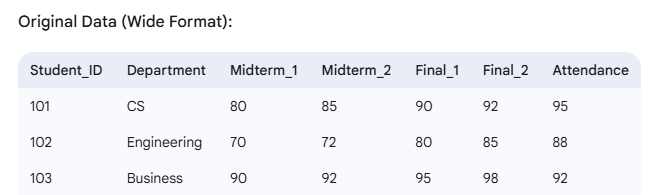


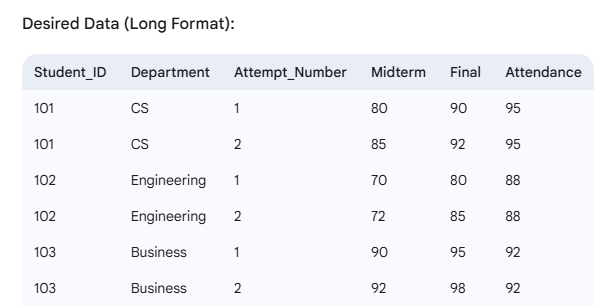

# 3. Implementation of Unpivot using melt()

In [25]:
df_wide

,Student_ID,Department,Midterm_1,Midterm_2,Final_1,Final_2,Attendance
0,101,CS,80,85,90,92,95
1,102,Engineering,75,78,80,85,88
2,103,Business,90,92,95,98,92
3,104,CS,65,70,75,78,80


In [26]:
# Use pd.wide_to_long() to unpivot the data

df_long = pd.wide_to_long(
    df=df_wide,                       # The DataFrame to unpivot
    stubnames=['Midterm', 'Final'],   # The common prefixes of the columns to unpivot
    i=['Student_ID', 'Department'],   # Columns to keep as identifier variables (new index)
    j='Attempt_Number',               # Name for the new column that will store the suffix
    sep='_',                          # Separator between stubname and suffix (e.g., Midterm_1 uses '_')
    suffix=r'\d+'                     # Regex pattern for the suffix (matches one or more digits)
)

In [27]:
# Reset the index to make 'Student_ID', 'Department', and 'Attempt_Number' regular columns

df_long = df_long.reset_index()

In [28]:
df_long

,Student_ID,Department,Attempt_Number,Attendance,Midterm,Final
0,101,CS,1,95,80,90
1,101,CS,2,95,85,92
2,102,Engineering,1,88,75,80
3,102,Engineering,2,88,78,85
4,103,Business,1,92,90,95
5,103,Business,2,92,92,98
6,104,CS,1,80,65,75
7,104,CS,2,80,70,78


# Key insights

Verification:
* Notice how 'Midterm_1', 'Midterm_2', 'Final_1', 'Final_2' are gone.
* 'Attempt_Number' now contains '1' or '2'.
* 'Midterm' and 'Final' columns now hold the corresponding scores.
* 'Attendance' (not a stubname) remains as is.

# COMPLETED